In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df_num_origin = pd.read_csv('aau1043_dnm.tsv')
df_parental_age = pd.read_csv('aau1043_parental_age.tsv')

In [3]:
df_num_origin

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [4]:
df_parental_age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [5]:
proband_total_df = df_num_origin['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('tot_dnm')
pat = df_num_origin[df_num_origin['Phase_combined'] == 'father']['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm')
mat = df_num_origin[df_num_origin['Phase_combined'] == 'mother']['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm')

big = pd.merge(proband_total_df, pat, on = 'Proband_id')
big = pd.merge(big, mat, on = 'Proband_id')
big.reset_index(inplace=True)

cols = ['Proband_id', 'pat_dnm', 'mat_dnm', 'tot_dnm']
big = big[cols]
big

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,91410,10,111,122
1,114094,22,98,121
2,111288,21,93,115
3,8147,27,78,114
4,88246,25,87,113
...,...,...,...,...
391,121087,1,36,37
392,62630,5,28,34
393,76504,5,27,34
394,37789,3,17,34


In [6]:
plotting_df = pd.merge(big, df_parental_age, on = "Proband_id")
plotting_df

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,91410,10,111,122,51,34
1,114094,22,98,121,51,44
2,111288,21,93,115,53,44
3,8147,27,78,114,40,33
4,88246,25,87,113,56,46
...,...,...,...,...,...,...
391,121087,1,36,37,18,17
392,62630,5,28,34,23,20
393,76504,5,27,34,19,17
394,37789,3,17,34,19,19


(0.0, 125.0)

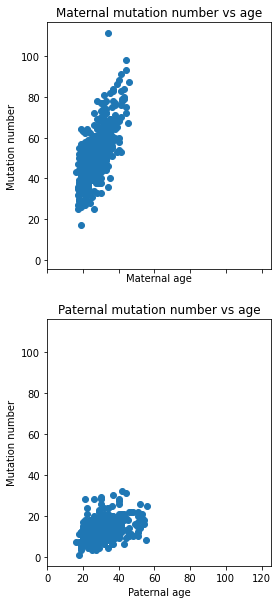

In [7]:
fig, ax = plt.subplots(nrows = 2, figsize = (4,10), sharex=True, sharey=True)
ax[0].scatter(x = plotting_df['Mother_age'], y = plotting_df['mat_dnm'])
ax[1].scatter(x = plotting_df['Father_age'], y = plotting_df['pat_dnm'])
ax[0].set_title('Maternal mutation number vs age')
ax[1].set_title('Paternal mutation number vs age')
ax[0].set_xlabel('Maternal age')
ax[0].set_ylabel('Mutation number')
ax[1].set_xlabel('Paternal age')
ax[1].set_ylabel('Mutation number')
ax[0].set_xlim(10,60)
ax[0].set_xlim(0,125)

In [9]:
model = smf.ols(formula = "mat_dnm - 1 + Mother_age", data = plotting_df)
results = model.fit()
results.summary()

PatsyError: model is missing required outcome variables

In [10]:
fig, ax = plt.subplots()
ax.hist( plotting_df["pat_dnm"], alpha = 0.6, label = 'paternal')
ax.hist( plotting_df["mat_dnm"], alpha = 0.6, label = 'maternal')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('Count')
plt.legend()
plt.show

SyntaxError: invalid syntax (<ipython-input-10-54fb5b2d6327>, line 3)

In [12]:
stats.ttest_ind(plotting_df["pat_dnm"],
                plotting_df["mat_dnm"])

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

In [13]:
model = smf.poisson(formula = "mat_dnm - 1 + Mother_age", data = plotting_df)
mat_results = model.fit()
mat_results.summary()

PatsyError: model is missing required outcome variables

In [14]:
pat_model = smf.poisson(formula = "pat_dnm - 1 + Father_age", data = plotting_df)
pat_results = pat_model.fit()
pat_results.summary()

PatsyError: model is missing required outcome variables

In [15]:
model = smf.poisson(formula = "mat_dnm - 1 + pat_dnm", data = plotting_df)
mat_vs_pat_results = model.fit()
mat_vs_pat_results.summary()

PatsyError: model is missing required outcome variables